## Sourcing & Analyzing Time Series Data 

### Table of Contents:
    1. Import libraries and data
    2. Subsetting, wrangling and cleaning time-series data (own dataset/USA executions)
    3. Testing for stationarity (own dataset/USA executions)
    4. Results of dataset
    5. Import Inflation Rates USA data
    6. Subsetting, wrangling and cleaning time-series data 
    7. Testing for stationarity
    8. Stationarity for Inflations Rates USA
    

### 1. Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
%matplotlib inline

In [3]:
# Define path

path = r'/Users/jodikim/02_2023_Death_Penalty_Analysis'

In [4]:
# Import data for project

df = pd.read_csv(r'/Users/jodikim/02_2023_Death_Penalty_Analysis/02_Data/Prepared_Data/us_executions_cleaned.csv', index_col = False)

In [5]:
df.head()

,Unnamed: 0,id,execution_volunteer,number_victims,juvenile,race,sex,region,country,state,...,asian_male_victims,native_amer_male_victims,other_race_male_victims,white_female_victims,black_female_victims,latino_female_victims,asian_female_victims,amerind_nativealask_female_victims,other_race_female_victims,victims_races
0,0,1,yes,1,no,White,Male,West,United States,Utah,...,0,0,0,0,0,0,0,0,0,White
1,1,2,no,1,no,White,Male,South,United States,Florida,...,0,0,0,0,0,0,0,0,0,White
2,2,3,yes,1,no,White,Male,West,United States,Nevada,...,0,0,0,0,0,0,0,0,0,White
3,3,4,yes,4,no,White,Male,Midwest,United States,Indiana,...,0,0,0,2,0,0,0,0,0,White
4,4,5,yes,1,no,White,Male,South,United States,Virginia,...,0,0,0,0,0,0,0,0,0,White


In [6]:
# Dropping column 'unnamed'

df = df.drop(columns = ['Unnamed: 0'])

In [7]:
df.columns

Index(['id', 'execution_volunteer', 'number_victims', 'juvenile', 'race',
       'sex', 'region', 'country', 'state', 'foreign_national',
       'execution_date', 'white_male_victims', 'black_male_victims',
       'latino_male_victims', 'asian_male_victims', 'native_amer_male_victims',
       'other_race_male_victims', 'white_female_victims',
       'black_female_victims', 'latino_female_victims', 'asian_female_victims',
       'amerind_nativealask_female_victims', 'other_race_female_victims',
       'victims_races'],
      dtype='object')

### 2. Subsetting, wrangling and cleaning time-series data

In [8]:
# Creating a new subset

df_1 = df[['execution_date', 'number_victims']]

In [9]:
df_1.head()

,execution_date,number_victims
0,1/17/77,1
1,5/25/79,1
2,10/22/79,1
3,3/9/81,4
4,8/10/82,1


In [10]:
type(df_1)

pandas.core.frame.DataFrame

In [11]:
# Resetting index to use "execution_date" column as a filter

df_2 = df_1.reset_index()

In [12]:
df_2.head()

,index,execution_date,number_victims
0,0,1/17/77,1
1,1,5/25/79,1
2,2,10/22/79,1
3,3,3/9/81,4
4,4,8/10/82,1


In [22]:
df_2 = df_1.loc[(df_2['execution_date'] >= '1977-01-17') & (df_1['execution_date'] < '2023-01-12')]

In [23]:
df_2.head()

,execution_date,number_victims
12,2/29/84,1
37,2/20/85,1
143,2/26/91,1
160,2/11/92,1
161,2/28/92,2


In [24]:
df_2.shape

(103, 2)

In [25]:
# Set the "execution_date" column as the index

from datetime import datetime

df_2['datetime'] = pd.to_datetime(df_2['execution_date']) 
df_2 = df_2.set_index('datetime') 
df_2.drop(['execution_date'], axis=1, inplace=True) 
df_2.head()

,number_victims
datetime,
1984-02-29,1
1985-02-20,1
1991-02-26,1
1992-02-11,1
1992-02-28,2


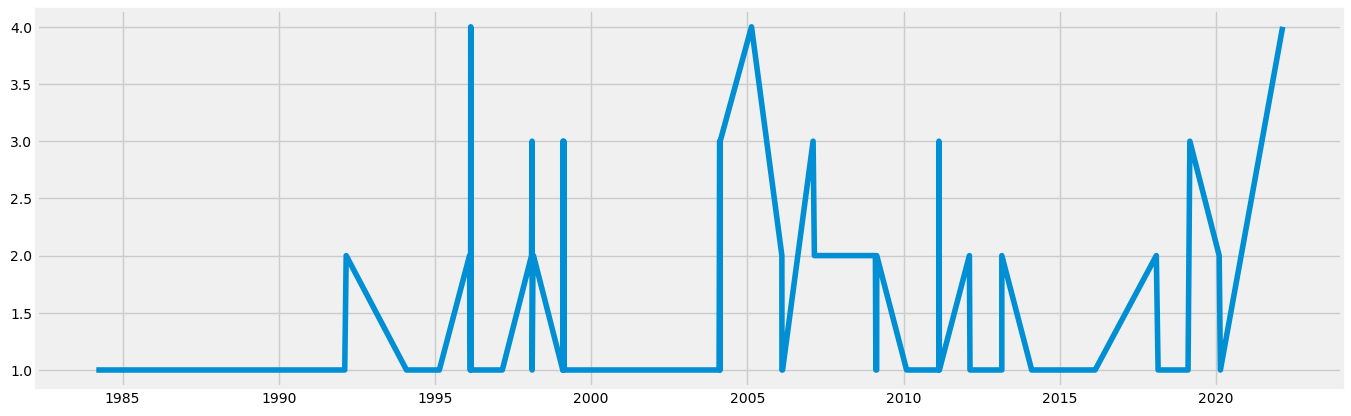

In [26]:
# Plotting new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_2)

In [27]:
# Checking for missing values

df_2.isnull().sum()

number_victims    0
dtype: int64

In [29]:
# Checking for duplicates

dups = df_2.duplicated()

In [30]:
dups

datetime
1984-02-29    False
1985-02-20     True
1991-02-26     True
1992-02-11     True
1992-02-28    False
              ...  
2019-02-07     True
2019-02-28     True
2020-02-06     True
2020-02-20     True
2022-02-17     True
Length: 103, dtype: bool

In [32]:
dups.sum()

99

### Yes, there are duplicates as this column tracks the date a person was executed. There have been multiple people executed on the same day. Therefore this dataset is not appropriate for this test.

### 3. Testing for stationarity

In [36]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): 

    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)
    
# Applying the test using the function on the time series
dickey_fuller(df_2['number_victims'])    

Dickey-Fuller Stationarity test:
Test Statistic                -8.235980e+00
p-value                        5.888722e-13
Number of Lags Used            0.000000e+00
Number of Observations Used    1.020000e+02
Critical Value (1%)           -3.496149e+00
Critical Value (5%)           -2.890321e+00
Critical Value (10%)          -2.582122e+00
dtype: float64


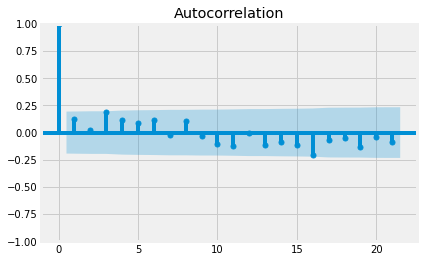

In [37]:
# Autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(df_2)
plt.show()

### 4. Results of testing own dataset

### The results are insignificant as the data source is not approriate for this kind of test. The data is not arranged across an even time interval or regular. The dates column in this dataset refers to a person's execution date. So it does not capture the quanity of executions at the same interval/time, to make this test valid.

### 5. Importing new data: USA inflation

In [47]:
# Configure API key 

quandl.ApiConfig.api_key = 'RFciqfLRHgM8N6NDa8f4'

In [48]:
# Importing the Inflation Rates "Consumer Price Index USA" variable.

data = quandl.get('RATEINF/CPI_USA')

In [49]:
data.head(5)

,Value
Date,
1913-01-31,9.8
1913-02-28,9.8
1913-03-31,9.8
1913-04-30,9.8
1913-05-31,9.7


In [50]:
data.shape

(1321, 1)

In [51]:
data.columns

Index(['Value'], dtype='object')

In [52]:
type(data)

pandas.core.frame.DataFrame

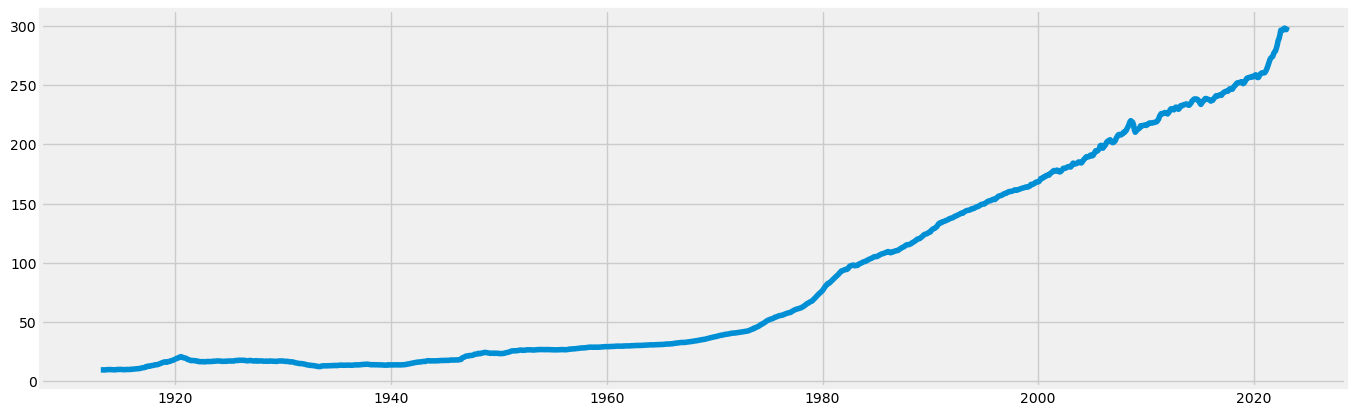

In [53]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 

plt.plot(data)

### 6. Subsetting, wrangling, and cleaning time-series data

In [54]:
# Resetting index to use the "Date" column as a filter

data_2 = data.reset_index()

In [55]:
data_2.head()

,Date,Value
0,1913-01-31,9.8
1,1913-02-28,9.8
2,1913-03-31,9.8
3,1913-04-30,9.8
4,1913-05-31,9.7


In [56]:
data_sub = data_2.loc[(data_2['Date'] >= '1980-01-31') & (data_2['Date'] < '2020-01-31')]

In [57]:
data_sub.shape

(480, 2)

In [58]:
data_sub.head()

,Date,Value
804,1980-01-31,77.8
805,1980-02-29,78.9
806,1980-03-31,80.1
807,1980-04-30,81.0
808,1980-05-31,81.8


In [59]:
# Setting the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) 
data_sub = data_sub.set_index('datetime') 
data_sub.drop(['Date'], axis=1, inplace=True) 
data_sub.head()

,Value
datetime,
1980-01-31,77.8
1980-02-29,78.9
1980-03-31,80.1
1980-04-30,81.0
1980-05-31,81.8


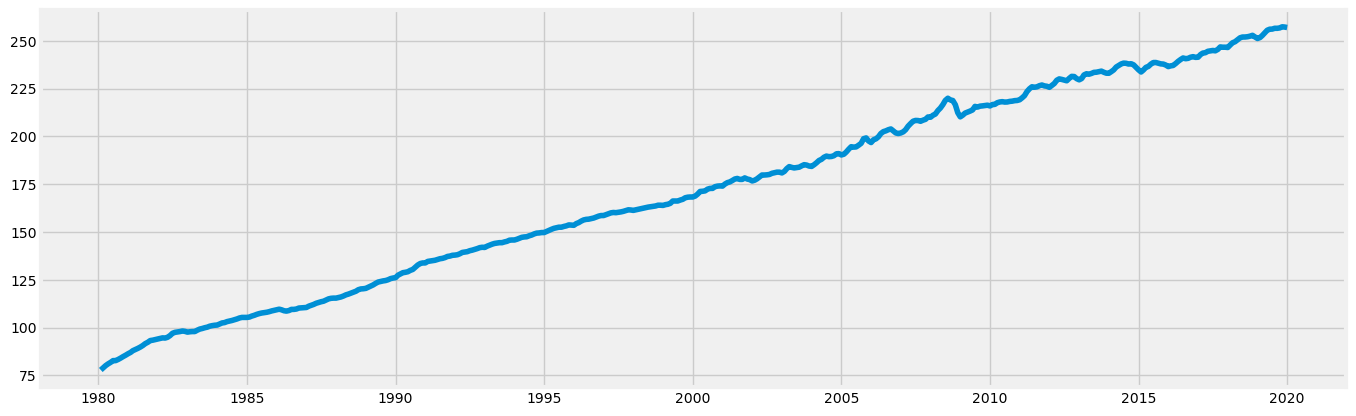

In [60]:
# Plotting the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [61]:
# Checking for missing values 

data_sub.isnull().sum() 

Value    0
dtype: int64

In [63]:
# Checking for duplicates

dups = data_sub.duplicated()
dups.sum()

29

In [64]:
dups.head()

datetime
1980-01-31    False
1980-02-29    False
1980-03-31    False
1980-04-30    False
1980-05-31    False
dtype: bool

In [65]:
dups

datetime
1980-01-31    False
1980-02-29    False
1980-03-31    False
1980-04-30    False
1980-05-31    False
              ...  
2019-08-31    False
2019-09-30    False
2019-10-31    False
2019-11-30    False
2019-12-31    False
Length: 480, dtype: bool

#### There are duplicates in the value column as inflation rates may stay the same from time to time

### 7. Time-series analysis: decomposition

In [66]:
# Decomposing the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [67]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

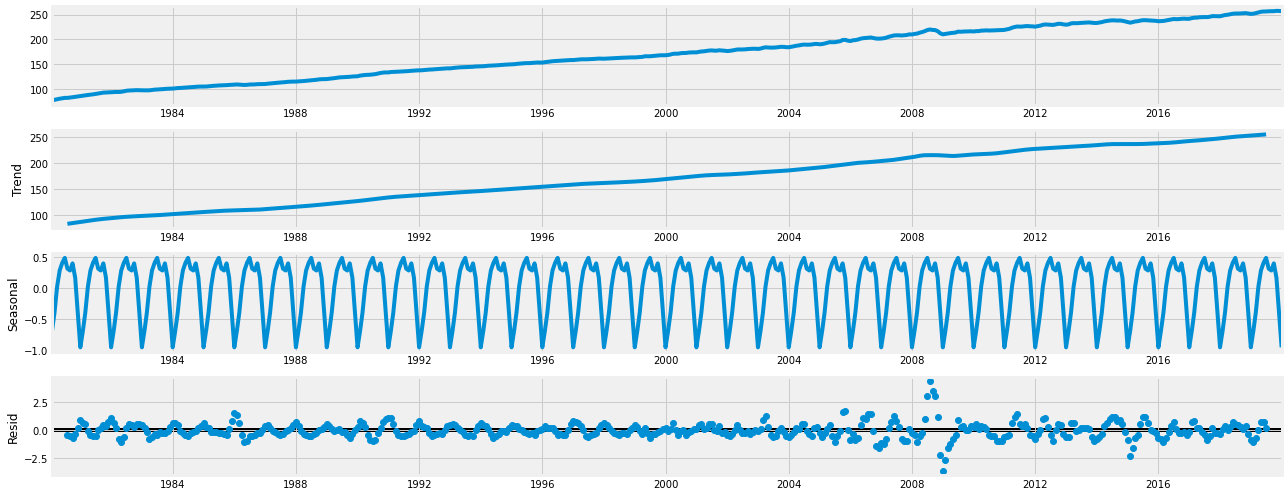

In [68]:
# Plotting the separate components

decomposition.plot()
plt.show()

#### The trend chart show that there is an upward trend over time with inflation in the US. After 2008 the line goes back down slightly and then continues to rise. 

#### The seasonality chart suggests that there are seasonal fluctuations since there are spikey curves at a regular intervals.

#### The residual chart shows that there was 'noise' flucuations in inflation leading up to the 2008 finanical crisis and there after. It's also interesting to see flucuations between 1984-1988 and in the early 90s. 

### 7. Testing for stationarity

In [69]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): 
   
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -0.384132
p-value                          0.912715
Number of Lags Used             12.000000
Number of Observations Used    467.000000
Critical Value (1%)             -3.444431
Critical Value (5%)             -2.867749
Critical Value (10%)            -2.570077
dtype: float64


#### The test statistic is larger than the critical values, so the data is non-stationary.

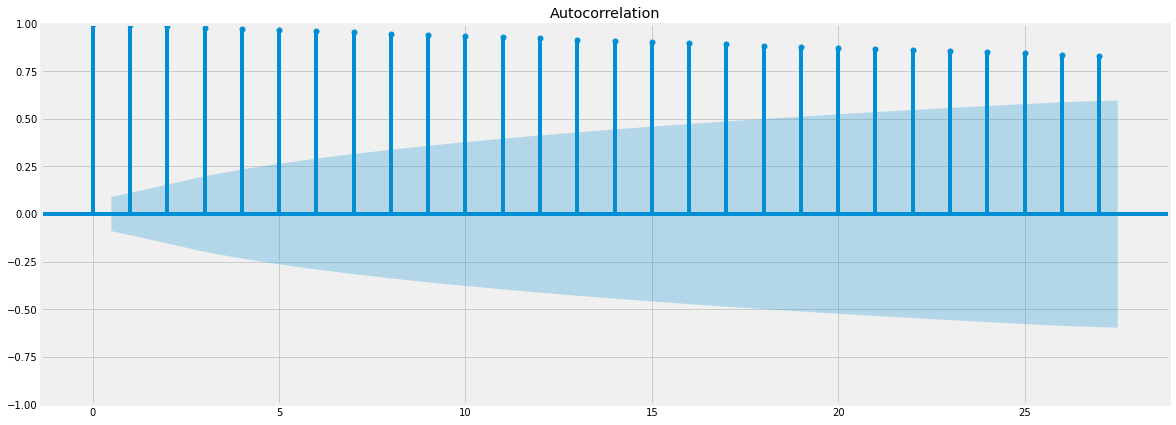

In [70]:
# Plotting of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_sub)
plt.show()

### 8. Stationarizing the Inflation Rates USA

In [72]:
data_diff = data_sub - data_sub.shift(1) 

In [73]:
data_diff.dropna(inplace = True) 

In [74]:
data_diff.head()

,Value
datetime,
1980-02-29,1.1
1980-03-31,1.2
1980-04-30,0.9
1980-05-31,0.8
1980-06-30,0.9


In [75]:
data_diff.columns

Index(['Value'], dtype='object')

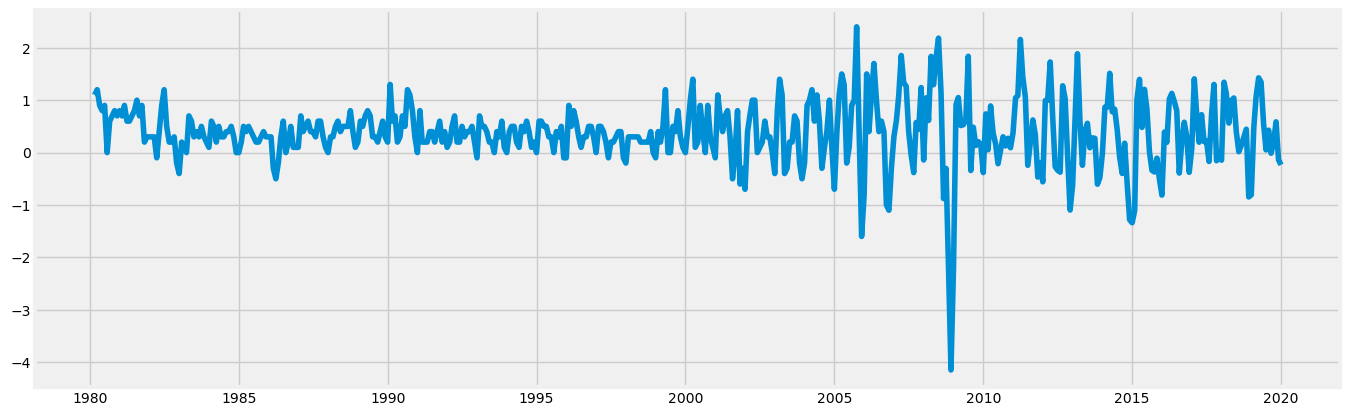

In [76]:
# Checking out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [77]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -5.786683e+00
p-value                        4.980595e-07
Number of Lags Used            1.100000e+01
Number of Observations Used    4.670000e+02
Critical Value (1%)           -3.444431e+00
Critical Value (5%)           -2.867749e+00
Critical Value (10%)          -2.570077e+00
dtype: float64


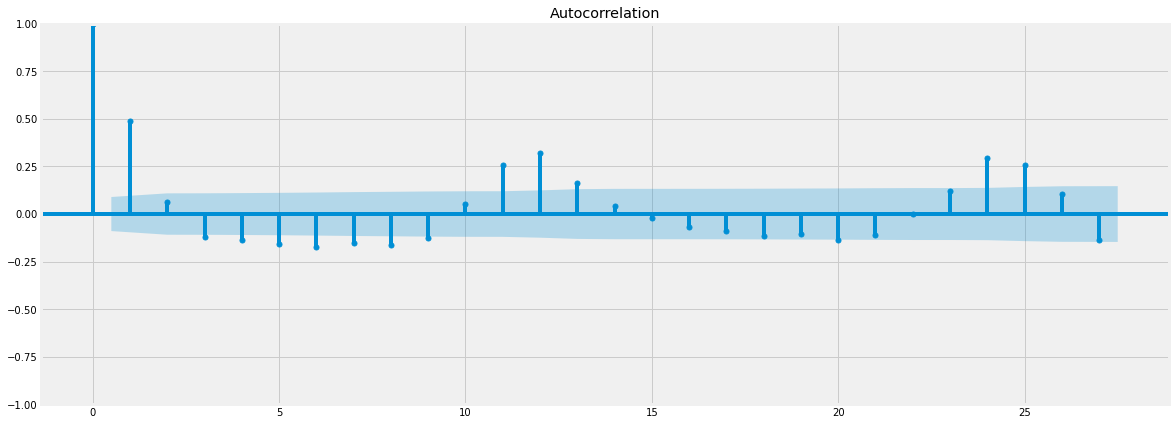

In [78]:
plot_acf(data_diff)
plt.show()

#### In conclusion, the test statistic is now smaller than the critical value. And there are more values within the blue interval compared to before. However, the p-value is 4.9 and there are only 4.6 number of observations used. This may have to do with the differencing. More practice is needed to fully undestand time-series analysis. 